# Статистический анализ двух бинарных выборок

## 📊 Условие задачи

### Исходные данные:
- **Две бинарные выборки** с вероятностями успеха:
  - $p_1 = 0.35$ (первая выборка)
  - $p_2 = 0.40$ (вторая выборка)
- **Уровень значимости**: $\alpha = 0.05$ (p-value)
- **Минимальный детектируемый эффект (MDE)**: $\delta = |p_2 - p_1| = 0.05$

### Поставленные задачи:

#### 1. 📈 Определение минимального размера выборки
**Цель**: Найти минимальное количество элементов $n$ в каждой выборке, необходимое для детекции MDE с заданной мощностью теста ($1 - \beta = 0.8$).

**Формула для расчета**:
$$
n = \frac{(z_{1-\alpha/2} \cdot \sqrt{2 \cdot \bar{p} \cdot (1-\bar{p})} + z_{1-\beta} \cdot \sqrt{p_1(1-p_1) + p_2(1-p_2)})^2}{(p_1 - p_2)^2}
$$

где:
- $\bar{p} = \frac{p_1 + p_2}{2}$ - объединенная пропорция
- $z_{1-\alpha/2}$ - квантиль нормального распределения для двустороннего теста
- $z_{1-\beta}$ - квантиль нормального распределения для мощности теста

#### 2. 🔄 Преобразование распределений через ЦПТ
**Цель**: Используя Центральную Предельную Теорему (ЦПТ), преобразовать биномиальные распределения к нормальным.

**Формулы преобразования**:
- Для выборки размера $n$ с вероятностью $p$:
  $$
  \text{Среднее: } \mu = p
  $$
  $$
  \text{Стандартное отклонение: } \sigma = \sqrt{\frac{p(1-p)}{n}}
  $$
- Получаем нормальные распределения:
  - Первая выборка: $N(\mu_1, \sigma_1)$
  - Вторая выборка: $N(\mu_2, \sigma_2)$

#### 3. 📊 Визуализация распределений и ошибок
**Требуется построить два графика**:

**График 1**: Двусторонняя альтернатива
- Распределения обеих выборок
- Критические области для ошибки I рода ($\alpha$)
- Область ошибки II рода ($\beta$)

**График 2**: Односторонняя альтернатива ($p_1 > p_2$)
- Распределения обеих выборок  
- Односторонние критические области
- Соответствующие области ошибок

**Обозначения на графиках**:
- 🟦 **Синяя область** - Ошибка I рода (вероятность $\alpha$)
- 🟥 **Красная область** - Ошибка II рода (вероятность $\beta$)
- 📍 **Вертикальные линии** - Критические значения и средние

#### 4. 📐 Расчет доверительных интервалов
**Цель**: Построить $95\%$ доверительные интервалы для средних значений обеих выборок.

**Формула доверительного интервала**:
$$
CI = \hat{p} \pm z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

где:
- $\hat{p}$ - выборочная пропорция
- $z_{1-\alpha/2}$ - квантиль стандартного нормального распределения

### 🎯 Ожидаемые результаты:

1. **Числовой результат**: Минимальный размер выборки $n$
2. **Параметры распределений**: $\mu_1, \sigma_1, \mu_2, \sigma_2$
3. **Визуализация**: Два графика с областями статистических ошибок
4. **Интервальные оценки**: Доверительные интервалы для $p_1$ и $p_2$

### 📈 Статистические гипотезы:

**Для двустороннего теста**:
$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Для одностороннего теста**:
$$
H_0: p_1 \leq p_2 \\
H_1: p_1 > p_2
$$

# Решение

Загрузка библиотек:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Image, display

## 1. Определение минимального размера выборки

Задаём исходные параметры:

In [2]:
p1 = 0.35
p2 = 0.40

alpha = 0.05
power = 0.8

Вычисляем объединённую пропорцию:

In [3]:
p_bar = (p1 + p2) / 2
print(f"Объединённая пропорция (p̄) = {p_bar:.4f}")

Объединённая пропорция (p̄) = 0.3750


Находим z-критические значения:

In [4]:
z_alpha = norm.ppf(1 - alpha / 2)
z_beta = norm.ppf(power)

print(f"z_(1-α/2) = {z_alpha:.4f}")
print(f"z_(1-β)   = {z_beta:.4f}")

z_(1-α/2) = 1.9600
z_(1-β)   = 0.8416


Вычисляем числитель и знаменатель формулы.

Несмещённые стандартные ошибки (без деления на n).

Стандартная ошибка под нулевой гипотезой (H0: p1 = p2):

In [5]:
se_null_unscaled = math.sqrt(2 * p_bar * (1 - p_bar))

Стандартная ошибка под альтернативной гипотезой (H1: p1 ≠ p2):

In [6]:
se_alt_unscaled = math.sqrt(p1 * (1 - p1) + p2 * (1 - p2))

Сумма в числителе:

In [7]:
numerator = (z_alpha * se_null_unscaled + z_beta * se_alt_unscaled) ** 2

Знаменатель — квадрат разницы пропорций (MDE²):

In [8]:
denominator = (p1 - p2) ** 2

Вычисляем n:

In [9]:
n_required = math.ceil(numerator / denominator)

print(f"Требуемый размер каждой выборки: {n_required}")
print(f"Общее количество наблюдений: {2 * n_required}")

Требуемый размер каждой выборки: 1471
Общее количество наблюдений: 2942


## 2. Преобразование распределений через ЦПТ

Средние (мат. ожидания):

In [10]:
mu1 = p1
mu2 = p2

Стандартные отклонения (стандартные ошибки):

In [11]:
se_p1 = math.sqrt(p1 * (1 - p1) / n_required)
se_p2 = math.sqrt(p2 * (1 - p2) / n_required)

print(f"Первая выборка: N(μ={mu1:.3f}, σ={se_p1:.4f})")
print(f"Вторая выборка: N(μ={mu2:.3f}, σ={se_p2:.4f})")

Первая выборка: N(μ=0.350, σ=0.0124)
Вторая выборка: N(μ=0.400, σ=0.0128)


Распределение разности:

In [12]:
mu_diff = p2 - p1
se_diff_alt = math.sqrt(se_p1**2 + se_p2**2)
print(f"Разность: N(μ={mu_diff:.3f}, σ={se_diff_alt:.4f})")

Разность: N(μ=0.050, σ=0.0178)


Неравные выборки: n1 = 735, n2 = 7350.

In [13]:
n1_unequal = 735
n2_unequal = 7350

Вычисление σ для неравных выборок:

In [14]:
se_p1_unequal = math.sqrt(p1 * (1 - p1) / n1_unequal)
se_p2_unequal = math.sqrt(p2 * (1 - p2) / n2_unequal)

## 3. Визуализация распределений и ошибок

Параметры распределений разности $ D = \hat{p}_2 - \hat{p}_1 $ для равных выборок.

Под нулевой гипотезой $ H_0: p_1 = p_2 = \bar{p} $:

In [15]:
se_diff_null = math.sqrt(2 * p_bar * (1 - p_bar) / n_required)
mu0 = 0.0

Под $ H_1 $: истинные $ p_1 $, $ p_2 $:

In [16]:
mu1_alt = p2 - p1

Критические значения:

In [17]:
z_alpha_2 = norm.ppf(1 - alpha / 2)
z_alpha_1 = norm.ppf(1 - alpha)

Критические точки (в шкале разности долей $ D = \hat{p}_2 - \hat{p}_1 $):

In [18]:
crit_low_2s = mu0 - z_alpha_2 * se_diff_null
crit_up_2s  = mu0 + z_alpha_2 * se_diff_null
crit_up_1s  = mu0 + z_alpha_1 * se_diff_null

Создадим сетку для x:

In [19]:
x = np.linspace(-0.04, 0.10, 1000)

Плотности для равных выборок:

In [20]:
pdf_H0 = norm.pdf(x, loc=mu0, scale=se_diff_null)
pdf_H1 = norm.pdf(x, loc=mu1_alt, scale=se_diff_alt)

Параметры распределения разности для неравных выборок:

In [21]:
se_diff_unequal_null = math.sqrt(p_bar * (1 - p_bar) * (1/n1_unequal + 1/n2_unequal))
se_diff_unequal_alt = math.sqrt(se_p1_unequal**2 + se_p2_unequal**2)

Критические точки для неравных выборок:

In [22]:
crit_low_2s_unequal = mu0 - z_alpha_2 * se_diff_unequal_null
crit_up_2s_unequal  = mu0 + z_alpha_2 * se_diff_unequal_null
crit_up_1s_unequal  = mu0 + z_alpha_1 * se_diff_unequal_null

Плотности для неравных выборок:

In [23]:
pdf_H0_unequal = norm.pdf(x, loc=mu0, scale=se_diff_unequal_null)
pdf_H1_unequal = norm.pdf(x, loc=mu1_alt, scale=se_diff_unequal_alt)

### **График 1**: Двусторонняя альтернатива

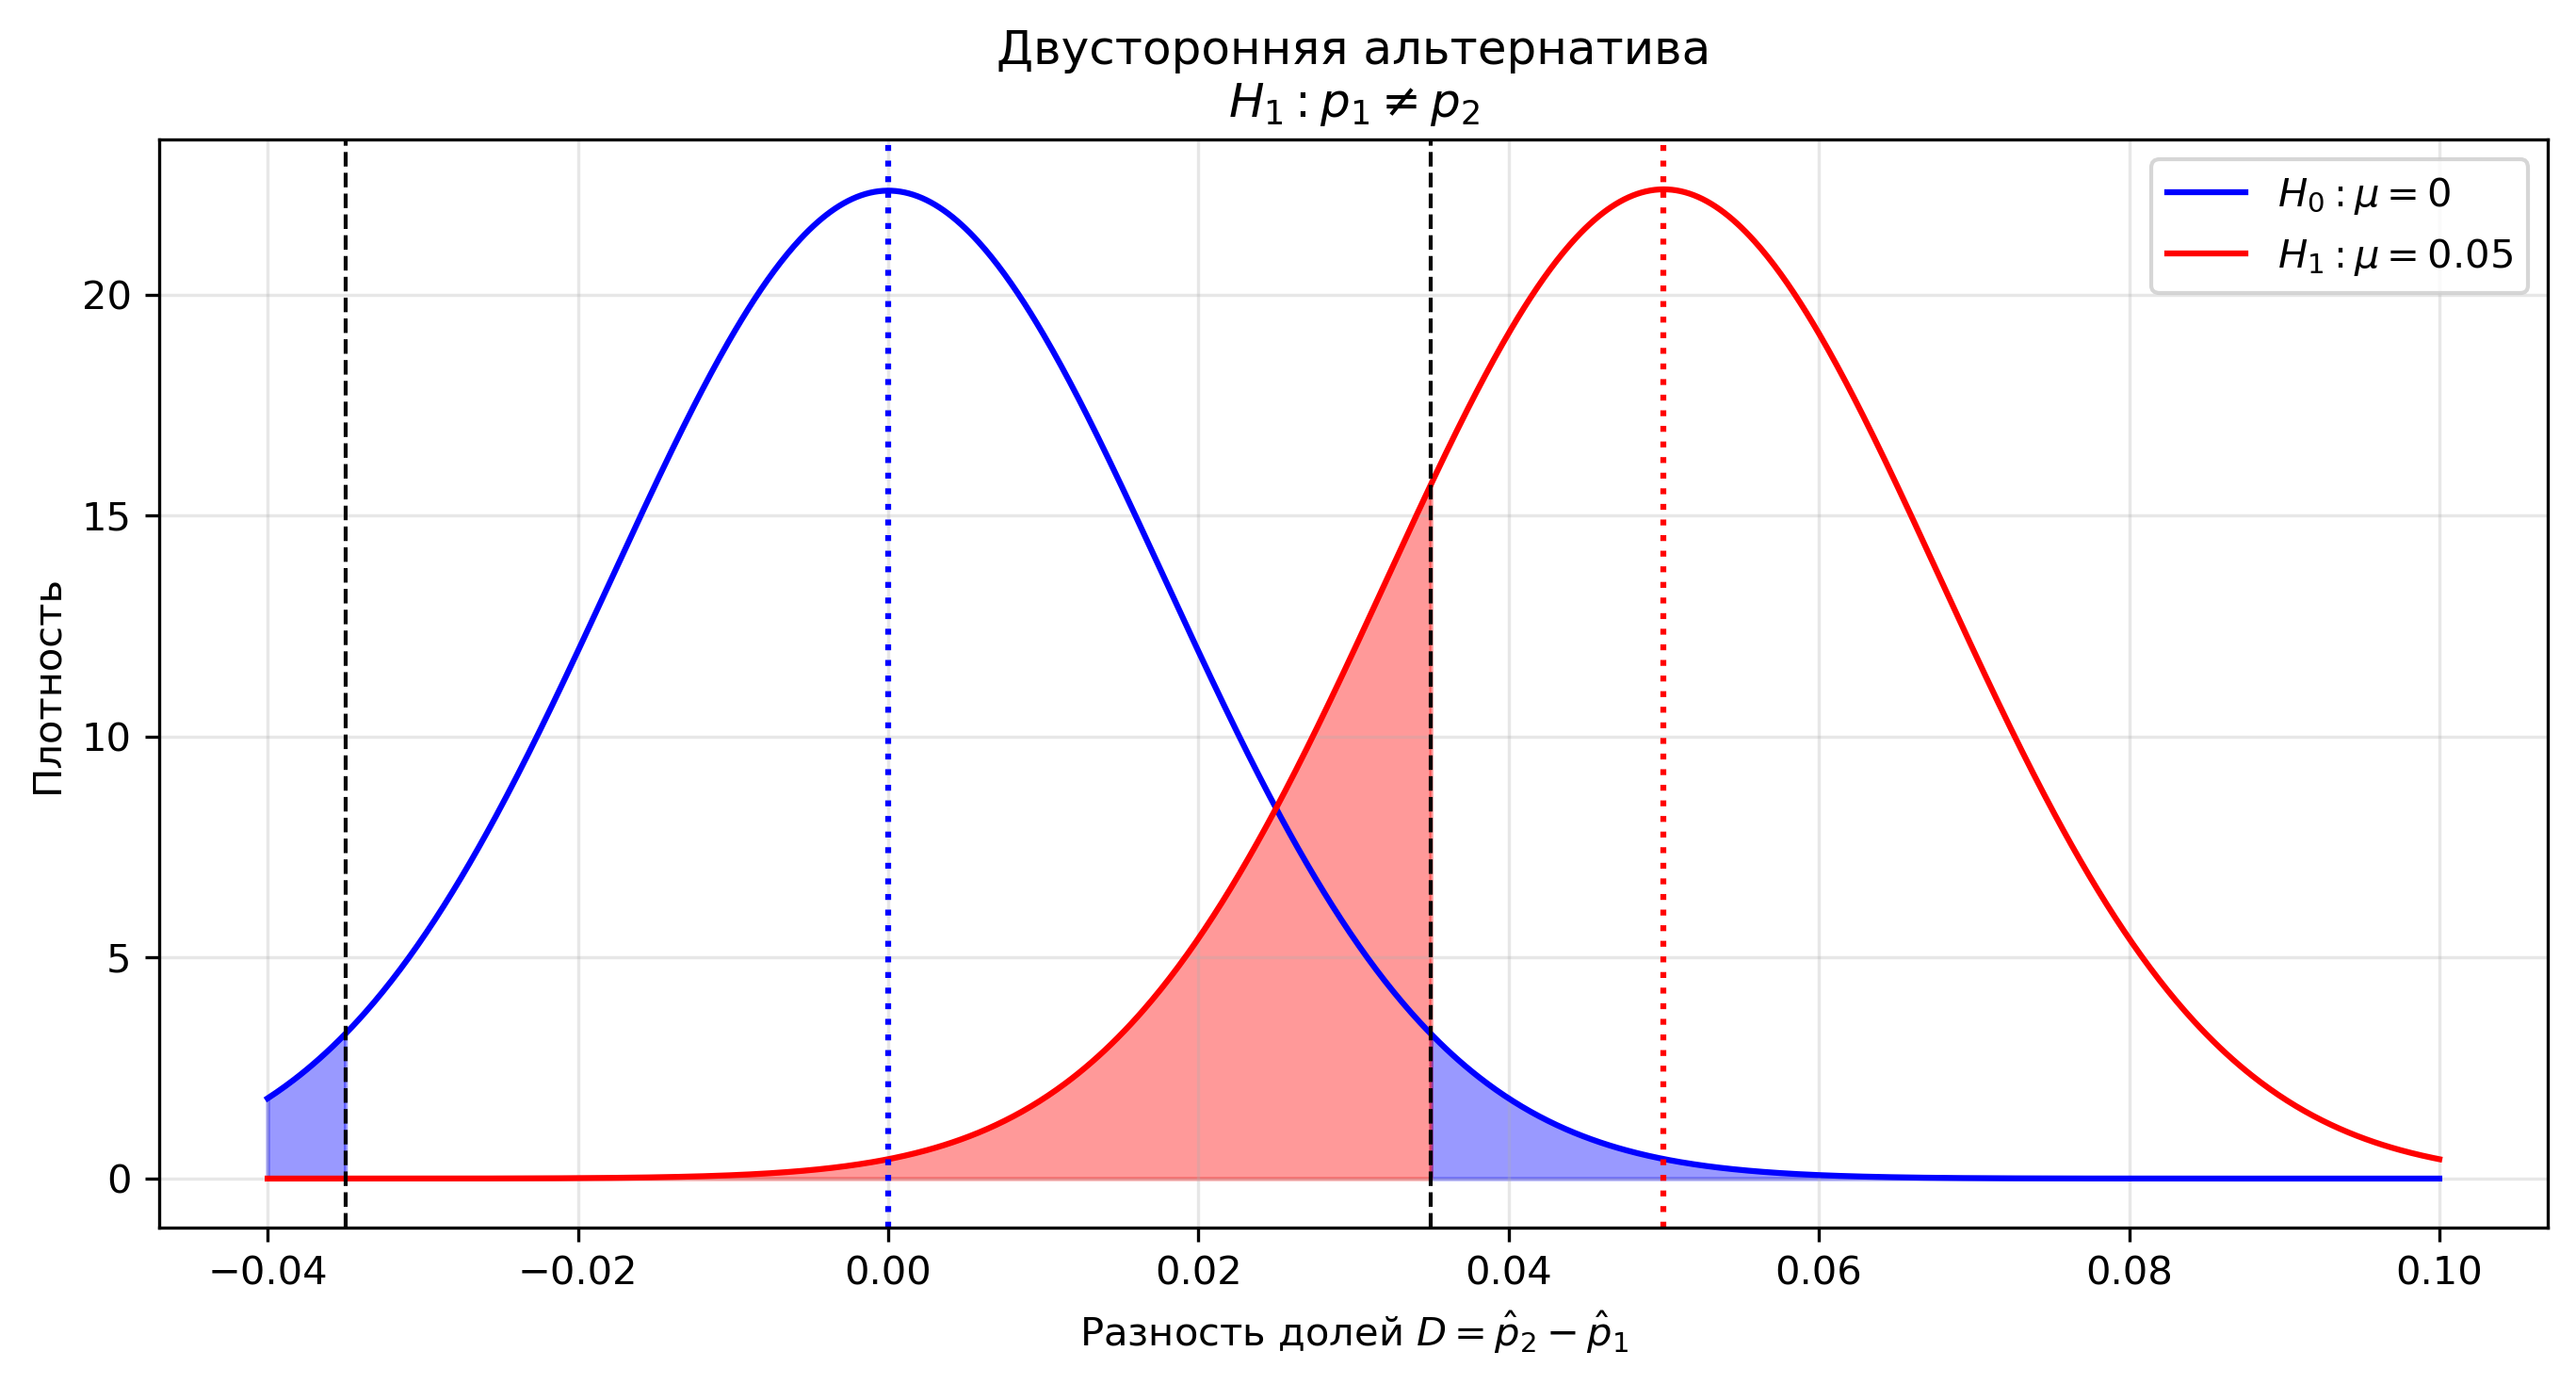

In [24]:
plt.figure(figsize=(24, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.plot(x, pdf_H0, 'b-', label=r'$H_0: \mu = 0$')
plt.plot(x, pdf_H1, 'r-', label=r'$H_1: \mu = 0.05$')

# Ошибки
x_left = np.linspace(x[0], crit_low_2s, 200)
x_right = np.linspace(crit_up_2s, x[-1], 200)
plt.fill_between(x_left, norm.pdf(x_left, mu0, se_diff_null), color='blue', alpha=0.4)
plt.fill_between(x_right, norm.pdf(x_right, mu0, se_diff_null), color='blue', alpha=0.4)

x_beta_2s = np.linspace(crit_low_2s, crit_up_2s, 400)
plt.fill_between(x_beta_2s, norm.pdf(x_beta_2s, mu1_alt, se_diff_alt), color='red', alpha=0.4)

# Линии
plt.axvline(crit_low_2s, color='black', linestyle='--', linewidth=1)
plt.axvline(crit_up_2s, color='black', linestyle='--', linewidth=1)
plt.axvline(mu0, color='blue', linestyle=':', linewidth=1.5)
plt.axvline(mu1_alt, color='red', linestyle=':', linewidth=1.5)

plt.title('Двусторонняя альтернатива\n$H_1: p_1 \\ne p_2$')
plt.xlabel('Разность долей $D = \\hat{p}_2 - \\hat{p}_1$')
plt.ylabel('Плотность')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('two_sided_alternative.png', dpi=300, bbox_inches='tight')

### **График 2**: Односторонняя альтернатива ($p_1 > p_2$)

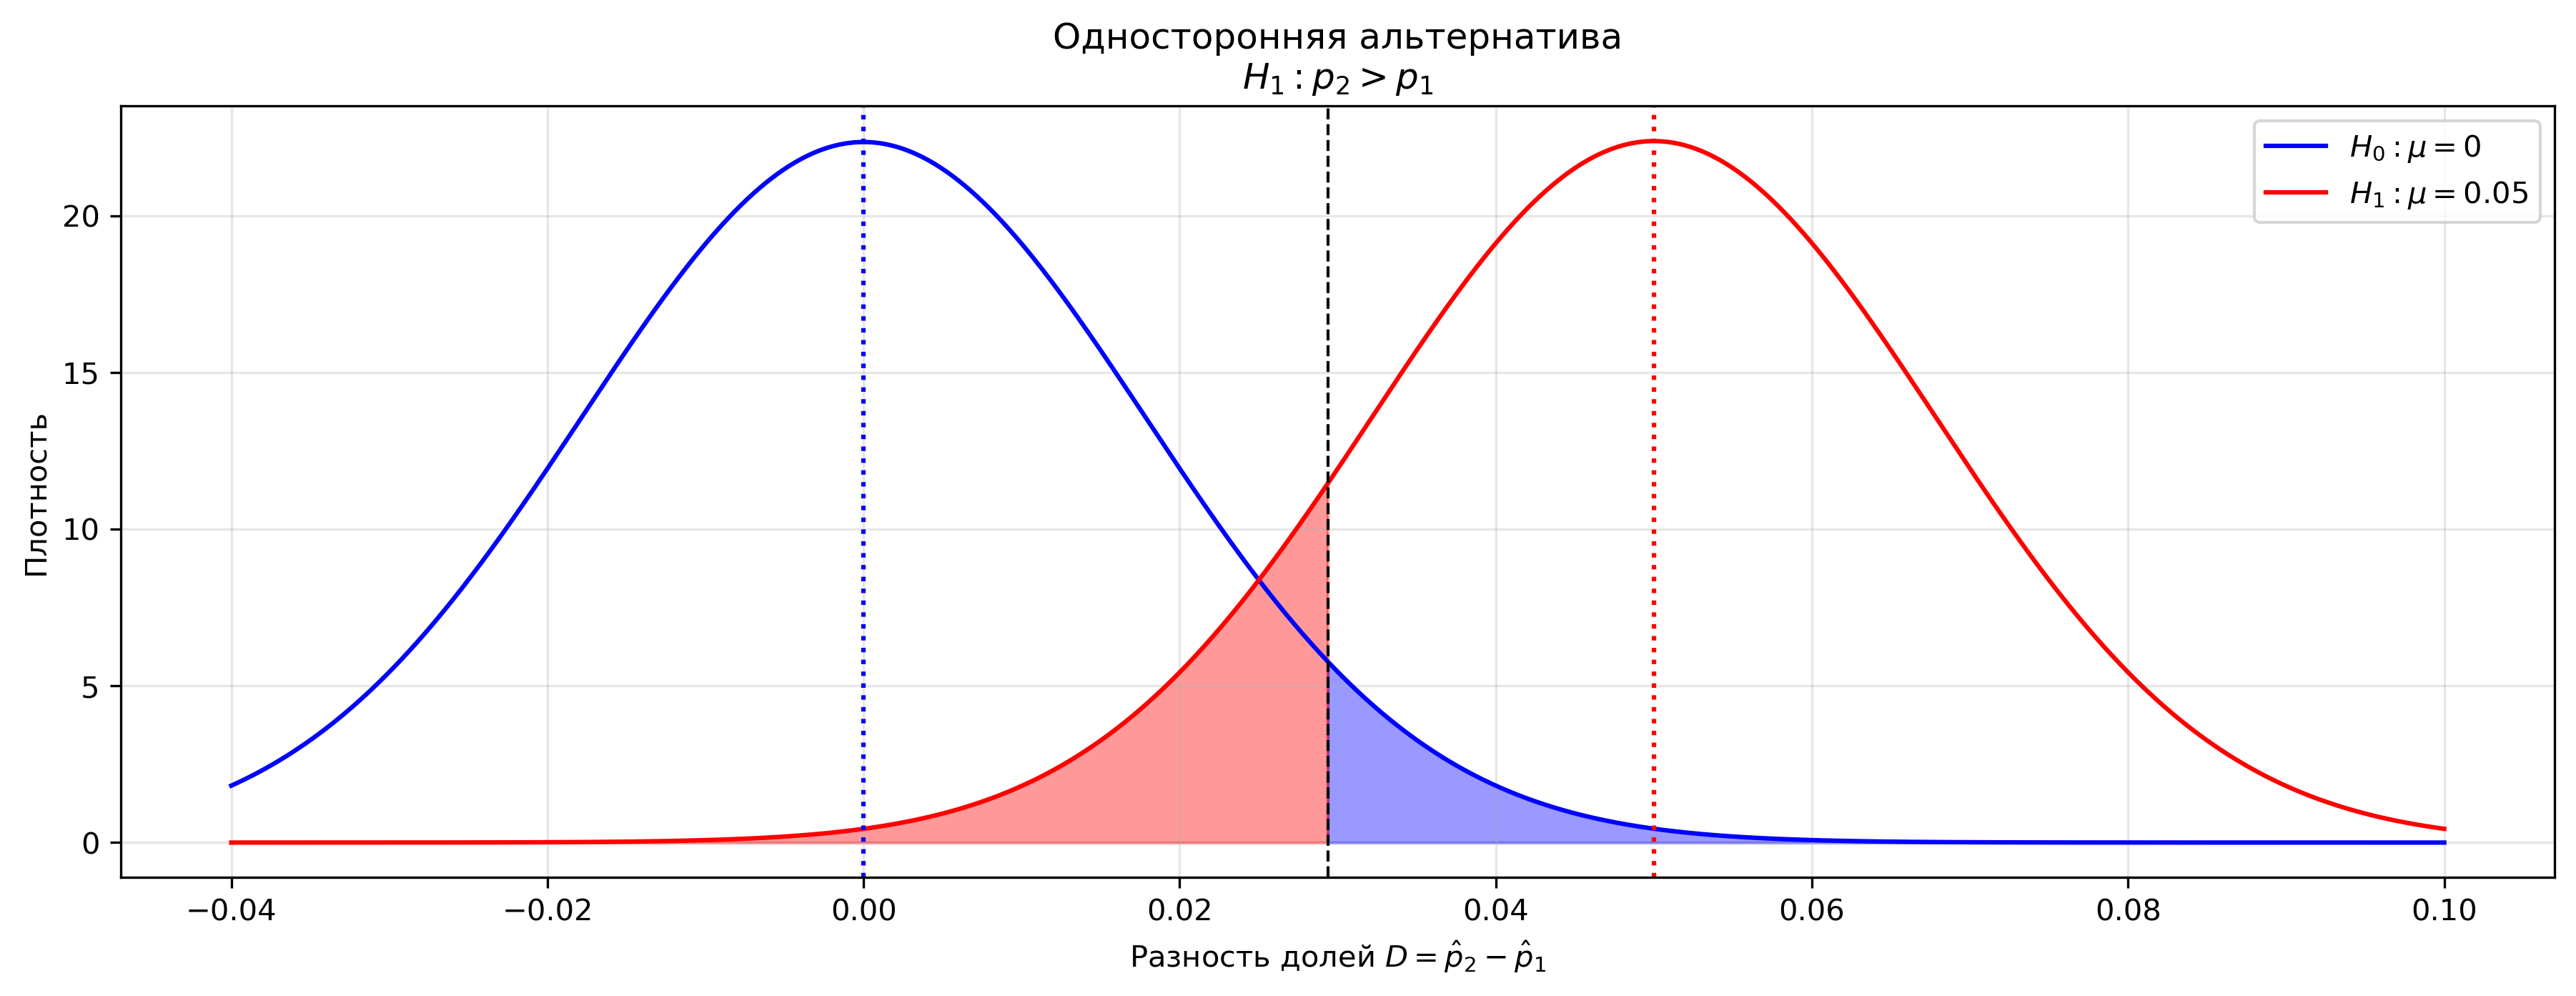

In [25]:
plt.figure(figsize=(24, 5), dpi=300)

plt.subplot(1, 2, 2)
plt.plot(x, pdf_H0, 'b-', label=r'$H_0: \mu = 0$')
plt.plot(x, pdf_H1, 'r-', label=r'$H_1: \mu = 0.05$')

# Ошибки
x_alpha_1s = np.linspace(crit_up_1s, x[-1], 200)
x_beta_1s = np.linspace(x[0], crit_up_1s, 400)
plt.fill_between(x_alpha_1s, norm.pdf(x_alpha_1s, mu0, se_diff_null), color='blue', alpha=0.4)
plt.fill_between(x_beta_1s, norm.pdf(x_beta_1s, mu1_alt, se_diff_alt), color='red', alpha=0.4)

# Линии
plt.axvline(crit_up_1s, color='black', linestyle='--', linewidth=1)
plt.axvline(mu0, color='blue', linestyle=':', linewidth=1.5)
plt.axvline(mu1_alt, color='red', linestyle=':', linewidth=1.5)

plt.title('Односторонняя альтернатива\n$H_1: p_2 > p_1$')
plt.xlabel('Разность долей $D = \\hat{p}_2 - \\hat{p}_1$')
plt.ylabel('Плотность')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout(pad=2.0)
plt.savefig('one_sided_alternative.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Расчет доверительных интервалов

Равные выборки:

In [26]:
z = z_alpha  # = norm.ppf(1 - alpha / 2)

ДИ для $ p_1 $:

In [27]:
margin1 = z * se_p1
ci1 = (p1 - margin1, p1 + margin1)
width1 = ci1[1] - ci1[0]

ДИ для $ p_2 $:

In [28]:
margin2 = z * se_p2
ci2 = (p2 - margin2, p2 + margin2)
width2 = ci2[1] - ci2[0]

In [29]:
print(f"\n Доверительные интервалы (95%):")
print(f"   Для p₁ = {p1:.2f}: [{ci1[0]:.4f}, {ci1[1]:.4f}]")
print(f"   Для p₂ = {p2:.2f}: [{ci2[0]:.4f}, {ci2[1]:.4f}]")


 Доверительные интервалы (95%):
   Для p₁ = 0.35: [0.3256, 0.3744]
   Для p₂ = 0.40: [0.3750, 0.4250]


ДИ для неравных выборок:

In [30]:
margin1_unequal = z * se_p1_unequal
margin2_unequal = z * se_p2_unequal

ci1_unequal = (p1 - margin1_unequal, p1 + margin1_unequal)
width1_unequal = ci1_unequal[1] - ci1_unequal[0]

ci2_unequal = (p2 - margin2_unequal, p2 + margin2_unequal)
width2_unequal = ci2_unequal[1] - ci2_unequal[0]

## Ответ

АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (С НЕРАВНЫМИ РАЗМЕРАМИ)

Вероятность в группе 1: 0.35
Вероятность в группе 2: 0.4
Уровень значимости (p-value): 0.05
Мощность теста: 0.8
------------------------------------------------------------

1. МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):
   n₁ = n₂ = 1471 элементов в каждой группе

2. ПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:

РАВНЫЕ ВЫБОРКИ (n = 1471):
Группа 1: N(μ = 0.3500, σ = 0.0124)
Группа 2: N(μ = 0.4000, σ = 0.0128)

НЕРАВНЫЕ ВЫБОРКИ (n₁ = 735, n₂ = 7350):
Группа 1: N(μ = 0.3500, σ = 0.0176)
Группа 2: N(μ = 0.4000, σ = 0.0057)

3. Двусторонняя альтернатива


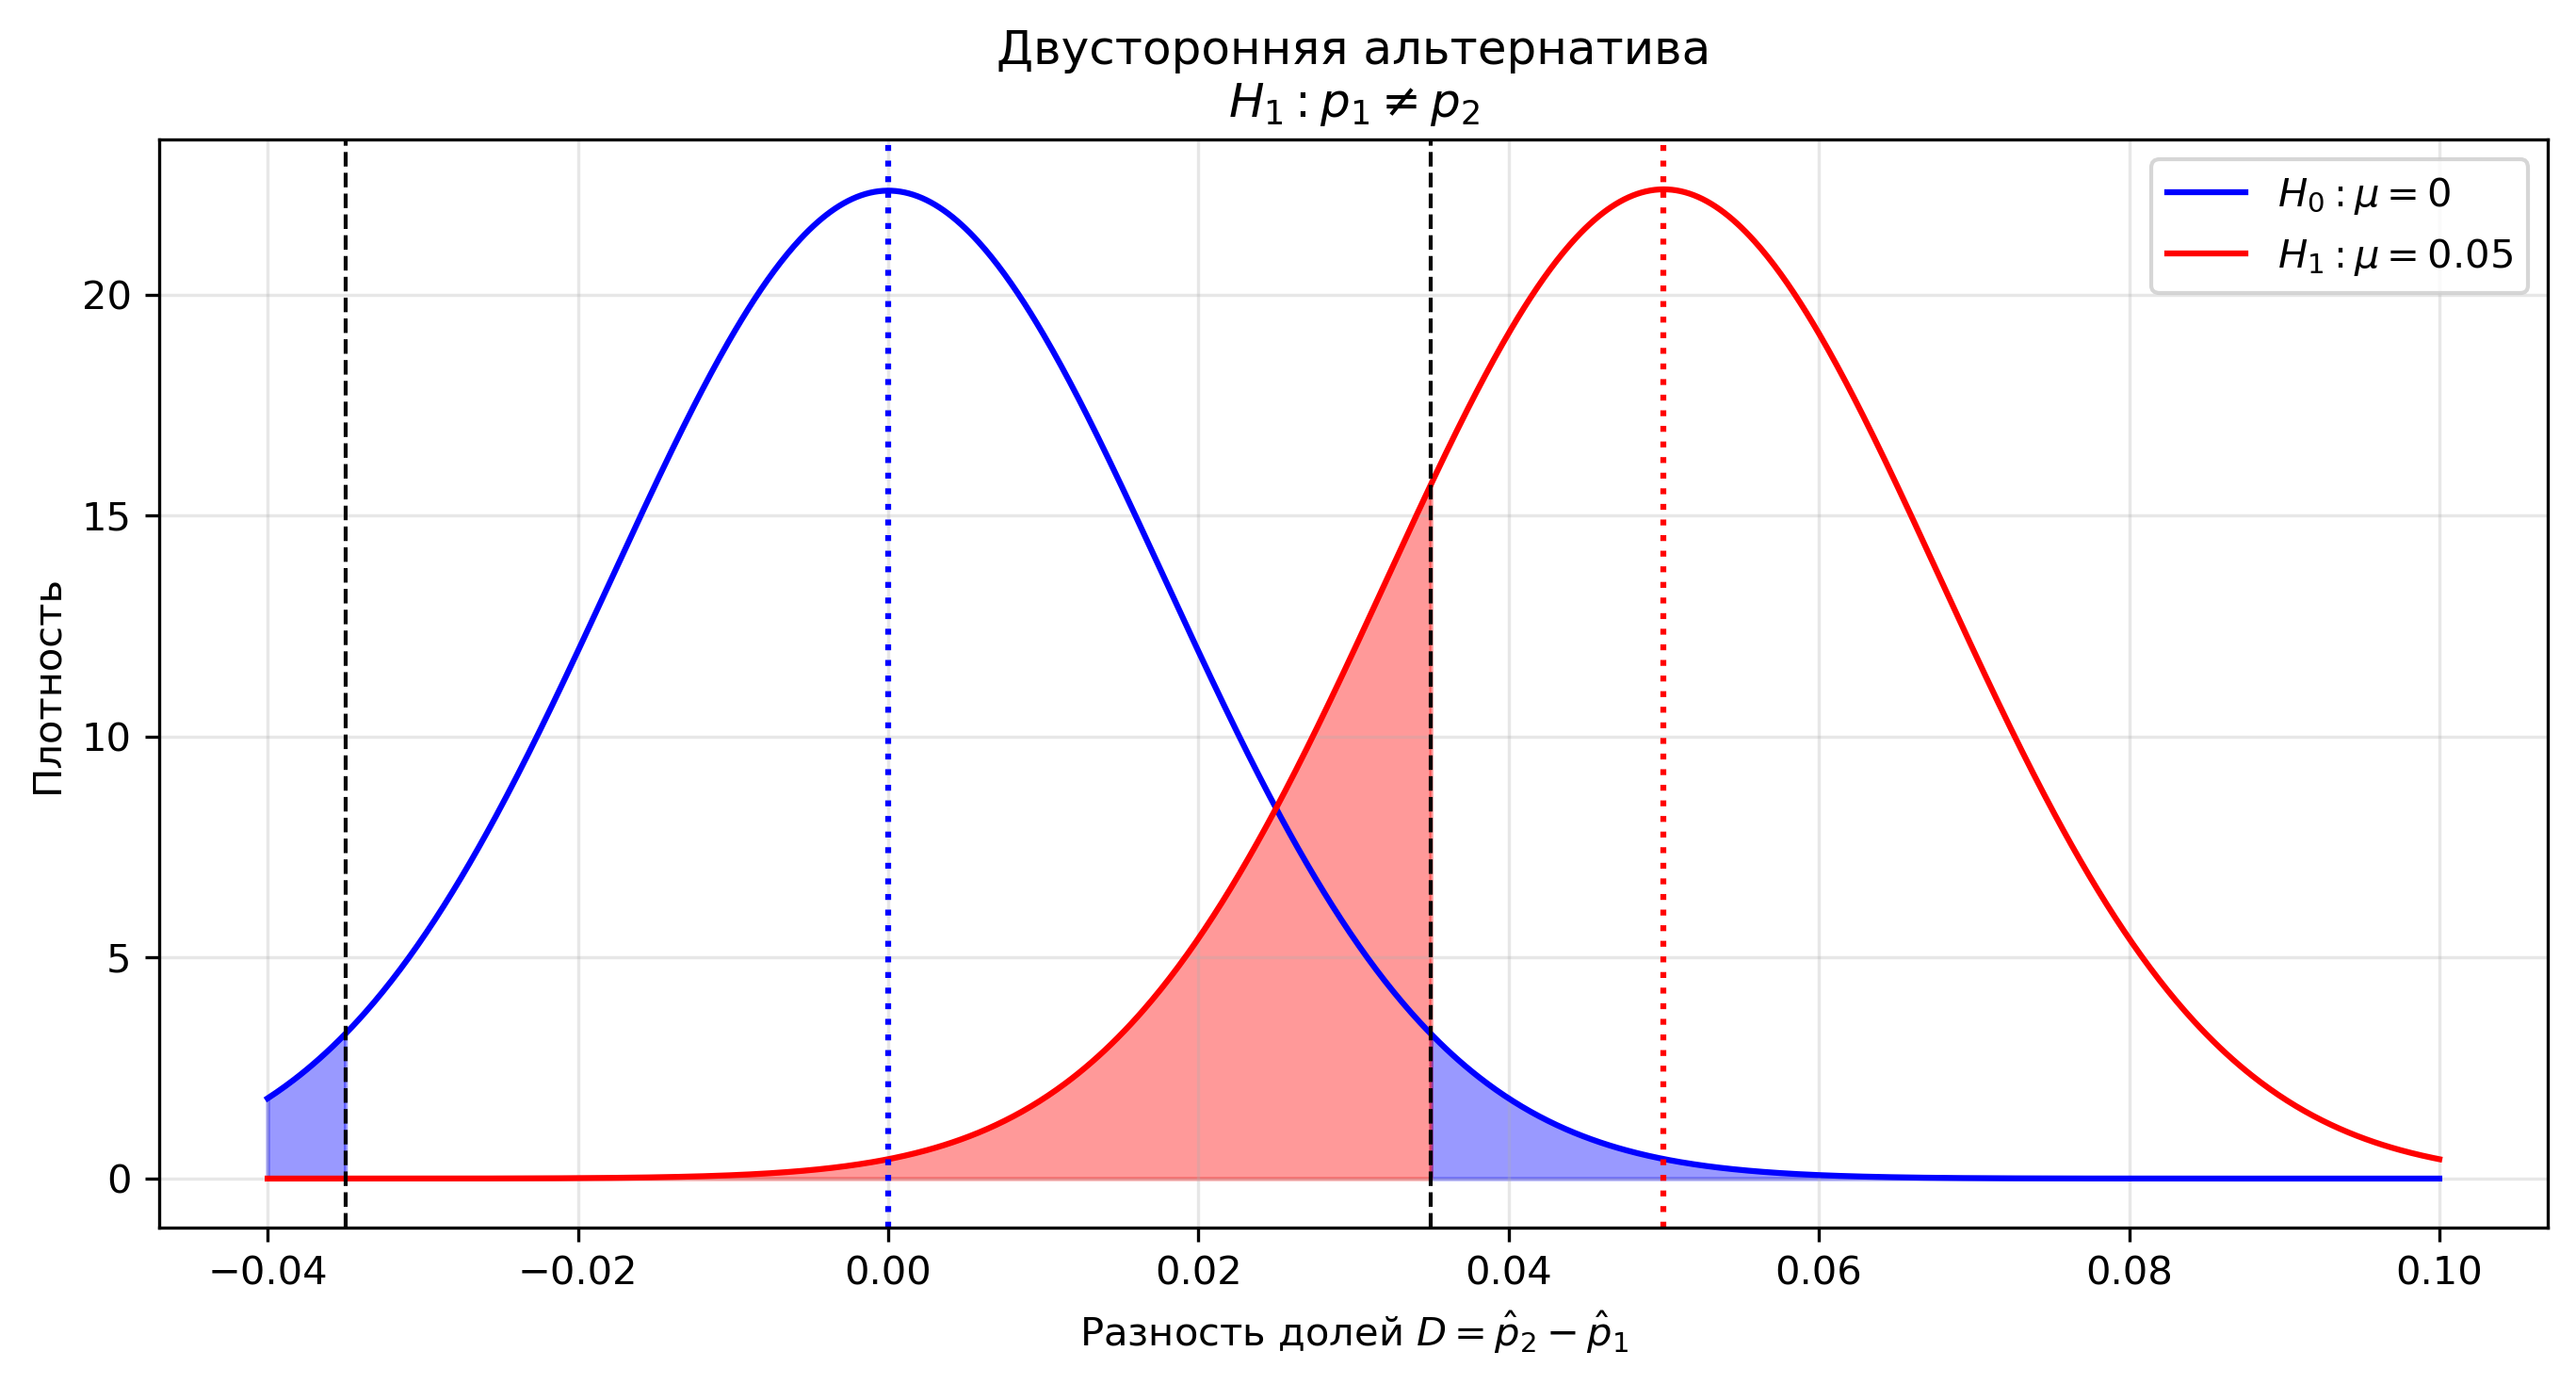


   Односторонняя альтернатива


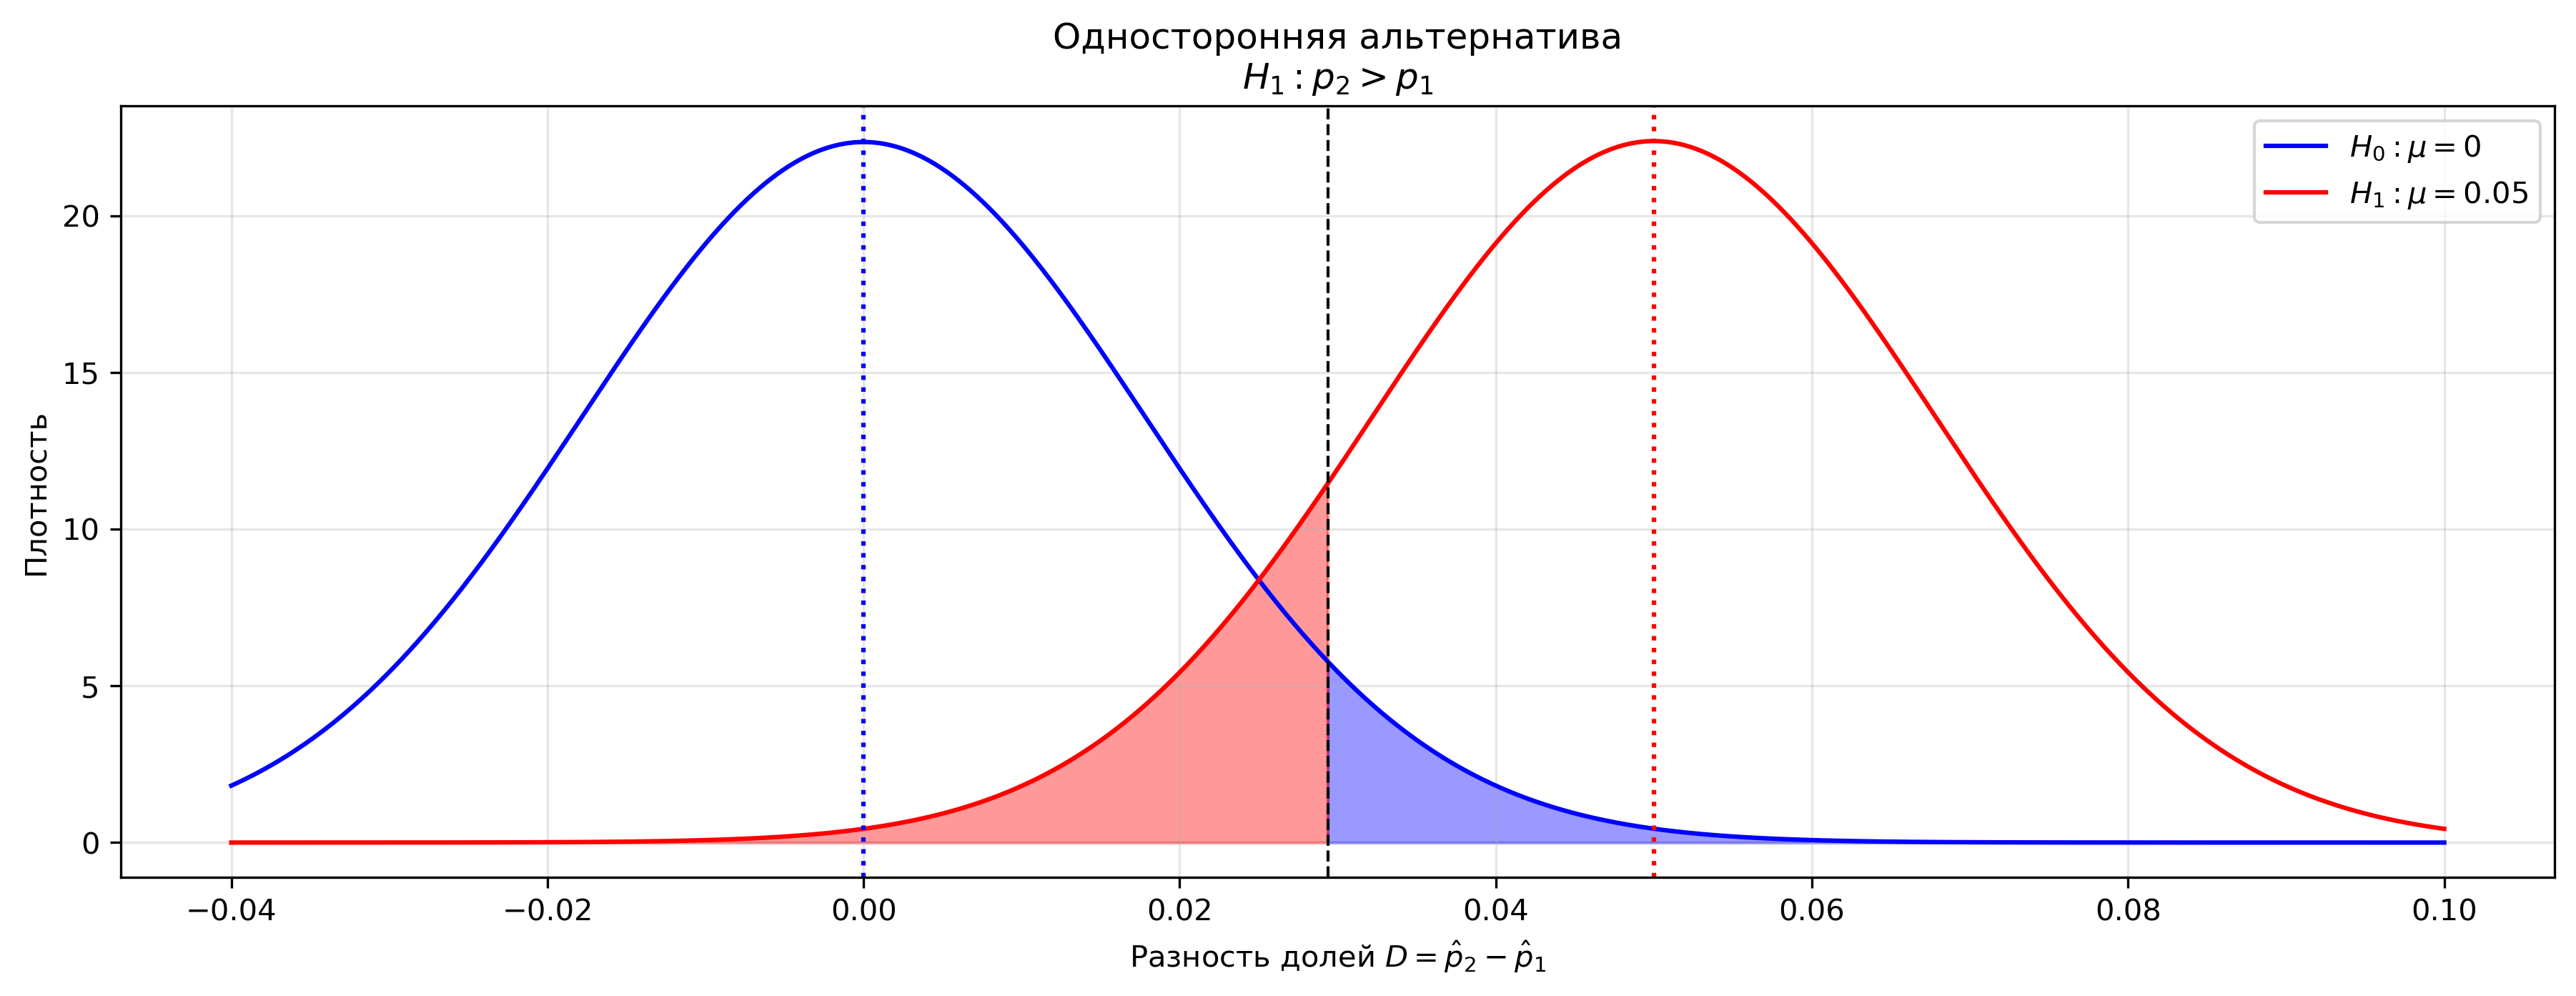


4. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия 0.95):

РАВНЫЕ ВЫБОРКИ:
Группа 1: [0.3256, 0.3744] (ширина: 0.0487)
Группа 2: [0.3750, 0.4250] (ширина: 0.0501)

НЕРАВНЫЕ ВЫБОРКИ:
Группа 1: [0.3155, 0.3845] (ширина: 0.0690)
Группа 2: [0.3888, 0.4112] (ширина: 0.0224)


In [31]:
print("============================================================")
print("АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (С НЕРАВНЫМИ РАЗМЕРАМИ)")
print("============================================================")
print("")
print(f"Вероятность в группе 1: {p1}")
print(f"Вероятность в группе 2: {p2}")
print(f"Уровень значимости (p-value): {alpha}")
print(f"Мощность теста: {power}")
print("------------------------------------------------------------")
print("")
print("1. МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):")
print(f"   n₁ = n₂ = {n_required} элементов в каждой группе")
print("")
print("2. ПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:")
print("")
print(f"РАВНЫЕ ВЫБОРКИ (n = {n_required}):")
print(f"Группа 1: N(μ = {p1:.4f}, σ = {se_p1:.4f})")
print(f"Группа 2: N(μ = {p2:.4f}, σ = {se_p2:.4f})")
print("")
print(f"НЕРАВНЫЕ ВЫБОРКИ (n₁ = {n1_unequal}, n₂ = {n2_unequal}):")
print(f"Группа 1: N(μ = {p1:.4f}, σ = {se_p1_unequal:.4f})")
print(f"Группа 2: N(μ = {p2:.4f}, σ = {se_p2_unequal:.4f})")
print("")
print("3. Двусторонняя альтернатива")
display(Image(filename='two_sided_alternative.png'))
print("")
print("   Односторонняя альтернатива")
display(Image(filename='one_sided_alternative.png'))
print("")
print("4. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия 0.95):")
print("")
print("РАВНЫЕ ВЫБОРКИ:")
print(f"Группа 1: [{ci1[0]:.4f}, {ci1[1]:.4f}] (ширина: {width1:.4f})")
print(f"Группа 2: [{ci2[0]:.4f}, {ci2[1]:.4f}] (ширина: {width2:.4f})")
print("")
print("НЕРАВНЫЕ ВЫБОРКИ:")
print(f"Группа 1: [{ci1_unequal[0]:.4f}, {ci1_unequal[1]:.4f}] (ширина: {width1_unequal:.4f})")
print(f"Группа 2: [{ci2_unequal[0]:.4f}, {ci2_unequal[1]:.4f}] (ширина: {width2_unequal:.4f})")